In [1]:
import nltk
# nltk.download("punkt")
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy import sparse
import re
import networkx as nx
import string
import matplotlib.pyplot as plt

In [2]:
TopicA = "'Professor' a Mohammad Hafeez ends 2020 with most T20I runs"
TopicB = "Pakistan takes the steps in light of new Covid virus strain detected in UK"
TopicC = 'Hafeez silences critics by ending 2020 as top run-scorer in T20 internationals'

In [3]:
# Convert the text to lowercase
listT = [TopicA,TopicB,TopicC]
listT = [x.lower() for x in listT]
print(listT)

["'professor' a mohammad hafeez ends 2020 with most t20i runs", 'pakistan takes the steps in light of new covid virus strain detected in uk', 'hafeez silences critics by ending 2020 as top run-scorer in t20 internationals']


In [4]:
# Remove the Numbers
count=0
for x in listT:
   listT[count] = re.sub(r'\d+', '', x)
   count+=1
print(listT)

["'professor' a mohammad hafeez ends  with most ti runs", 'pakistan takes the steps in light of new covid virus strain detected in uk', 'hafeez silences critics by ending  as top run-scorer in t internationals']


In [5]:
# remove punctuations
listT = [''.join(c for c in s if c not in string.punctuation) for s in listT]

print(listT)

['professor a mohammad hafeez ends  with most ti runs', 'pakistan takes the steps in light of new covid virus strain detected in uk', 'hafeez silences critics by ending  as top runscorer in t internationals']


In [6]:
# Remove whitespaces
listT = [x.strip(' ') for x in listT]
print(listT)

['professor a mohammad hafeez ends  with most ti runs', 'pakistan takes the steps in light of new covid virus strain detected in uk', 'hafeez silences critics by ending  as top runscorer in t internationals']


In [7]:
# Removal of stopwords
#en_stops = set(stopwords.words('english'))
#print(en_stops)


for count,ele in enumerate(listT): 
  text_tokens = word_tokenize(ele)
  tokeniz_list = [word for word in text_tokens if not word in stopwords.words()]
  sentence = (" ").join(tokeniz_list)
  listT[count] = sentence
  
print(listT)

['professor mohammad hafeez ends runs', 'pakistan takes steps light new covid virus strain detected uk', 'hafeez silences critics ending top runscorer internationals']


In [8]:
vectorizer = TfidfVectorizer()

# word count tf = term frequeucy  idf =  term frequency–inverse document frequency, 
vectors = vectorizer.fit_transform(listT)
feature_names = vectorizer.get_feature_names() # words for which tf-idf
dense = vectors.todense() # 
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

,covid,critics,detected,ending,ends,hafeez,internationals,light,mohammad,new,...,professor,runs,runscorer,silences,steps,strain,takes,top,uk,virus
0,0.000000,0.000000,0.000000,0.000000,0.467351,0.355432,0.000000,0.000000,0.467351,0.000000,...,0.467351,0.467351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.316228,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000,0.316228,0.000000,0.316228,...,0.000000,0.000000,0.000000,0.000000,0.316228,0.316228,0.316228,0.000000,0.316228,0.316228
2,0.000000,0.389888,0.000000,0.389888,0.000000,0.296520,0.389888,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.389888,0.389888,0.000000,0.000000,0.000000,0.389888,0.000000,0.000000


In [9]:
array = df.to_numpy()
A_sparse = sparse.csr_matrix(array) # 
cosineSimilarities = cosine_similarity(A_sparse,dense_output=False)
print('pairwise dense output:\n {}\n'.format(cosineSimilarities)) # formula similarity

pairwise dense output:
   (0, 2)	0.10539279301859408
  (0, 0)	1.0000000000000002
  (1, 1)	1.0000000000000007
  (2, 0)	0.10539279301859408
  (2, 2)	1.0000000000000002



In [10]:
sim = cosineSimilarities.toarray()
sim[sim == 1] = 0
sim

array([[1.        , 0.        , 0.10539279],
       [0.        , 1.        , 0.        ],
       [0.10539279, 0.        , 1.        ]])

In [11]:
def pageRank(G, s = .85, maxerr = .001):
    """
    Computes the pagerank for each of the n states
    Parameters
    ----------
    G: matrix representing state transitions
       Gij is a binary value representing a transition from state i to j.
    s: probability of following a transition. 1-s probability of teleporting
       to another state.
    maxerr: if the sum of pageranks between iterations is bellow this we will
            have converged.
    """
    n = G.shape[0]

    # transform G into markov matrix A
    A = sparse.csc_matrix(G,dtype=np.float)
    rsums = np.array(A.sum(1))[:,0]
    ri, ci = A.nonzero()
    A.data /= rsums[ri]

    # bool array of sink states
    sink = rsums==0

    # Compute pagerank r until we converge
    ro, r = np.zeros(n), np.ones(n)
    while np.sum(np.abs(r-ro)) > maxerr:
        ro = r.copy()
        # calculate each pagerank at a time
        for i in range(0,n):
            # inlinks of state i
            Ai = np.array(A[:,i].todense())[:,0]
            # account for sink states
            Di = sink / float(n)
            # account for teleportation to state i
            Ei = np.ones(n) / float(n)

            r[i] = ro.dot( Ai*s + Di*s + Ei*(1-s) )
            print("Document " + str(i) + ": " + str(r[i]))

    # return normalized pagerank
    return r/float(sum(r))

In [12]:
rank = pageRank(sim, s=0.5)
rank

Document 0: 0.9999999999999999
Document 1: 0.9999999999999999
Document 2: 1.0


array([0.33333333, 0.33333333, 0.33333333])

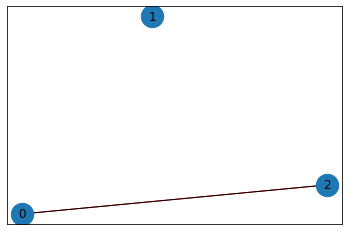


Rank:
{0: 0.3333333333333333, 1: 0.33333333333333337, 2: 0.3333333333333333}


In [13]:
G = nx.from_numpy_array(sim) # numpy array converting into G 
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, arrows=False)
plt.show()

pr = nx.pagerank_numpy(G, alpha=0.3)
print("\nRank:")
print(pr)

# Formatted Function to get ranks of sentences

In [14]:
def sentencesRank(sentences, s):
  vectorizer = TfidfVectorizer()
  vectors = vectorizer.fit_transform(sentences)
  feature_names = vectorizer.get_feature_names()
  dense = vectors.todense()
  denselist = dense.tolist()
  df = pd.DataFrame(denselist, columns=feature_names)
  print("TF-IDF:")
  print(df)

  array = df.to_numpy()
  A_sparse = sparse.csr_matrix(array)
  cosineSimilaritiesSparse = cosine_similarity(A_sparse)
  cosineSimilarities = cosine_similarity(A_sparse,dense_output=False)
  print('Cosine Similary:\n {}\n'.format(cosineSimilarities))

  #replace 1 with 0
  sim = cosineSimilarities.toarray()
  sim[sim == 1] = 0

  print('Similariy Matrix:\n {}\n'.format(sim))

  # rank = pageRank(cosineSimilarities.toarray(),s)
  G = nx.from_numpy_array(sim)
  rank = nx.pagerank_numpy(G, alpha=s)

  G = nx.from_numpy_array(sim)
  pos = nx.spring_layout(G)
  nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 500)
  nx.draw_networkx_labels(G, pos)
  nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)
  nx.draw_networkx_edges(G, pos, arrows=False)
  plt.show()

  print("Page rank:")
  print(rank)
  return rank;

TF-IDF:
         118      2018      2020       33        70        95  accessible  \
0   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
1   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
2   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
3   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
4   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
5   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.238736   
6   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
7   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
8   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
9   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
10  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
11  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.0

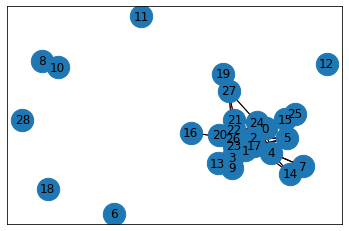

Page rank:
{0: 0.04957157817509813, 1: 0.05663215759968829, 2: 0.04520641782268471, 3: 0.03130720188631076, 4: 0.048725531974366874, 5: 0.03640007368193835, 6: 0.03802281368821269, 7: 0.034420032855130255, 8: 0.03802281368821281, 9: 0.02293014213223443, 10: 0.038022813688212836, 11: 0.0038022813688213014, 12: 0.03802281368821281, 13: 0.022930142132234328, 14: 0.03442003285513028, 15: 0.034390873976602745, 16: 0.0313572023866767, 17: 0.049922508331834016, 18: 0.0038022813688212997, 19: 0.016815038602074634, 20: 0.03665030805780523, 21: 0.022286388891287458, 22: 0.042168970467565604, 23: 0.057878834539404914, 24: 0.022527164394972845, 25: 0.02364799950668086, 26: 0.06597185850170531, 27: 0.05034144236925829, 28: 0.0038022813688212993}


Original Document:
According to Zameen Trends for buying apartments in Rawalpindi.
 Bahria Town has been the most sought-out place for buyers.
 If we look at the trends within Bahria.
 Bahria Town Phases 8.
 7 and 4 saw the most interest from buyers in No

In [15]:
doc = "According to Zameen Trends for buying apartments in Rawalpindi, Bahria Town has been the most sought-out place for buyers. If we look at the trends within Bahria, Bahria Town Phases 8, 7 and 4 saw the most interest from buyers in November. The society’s popularity is also due to its central location which is easily accessible from Islamabad Expressway, Faisal Avenue, and GT Road, including Phase 2, CBR Town, Phase 2, DHA, Soan Garden, Pakistan Town, and Gulistan Colony. According to Zameen.com’s data, the search volume for Bahria Town Rawalpindi apartments increased by 118% between 2018 and 2020; the highest rise observed among all property types in the society.. During this period, search volume for commercial units rose by 95%, while that for houses stood at 70%. With an increasing demand for apartments comes higher prospects for rental yield. Investing in an apartment at Bahria Town Rawalpindi guarantees solid rental yield, while the value of your property will continue to rise as well. Zameen.com’s data says that the average per square foot price of an apartment in Bahria Town Rawalpindi increased by 33% in the last three years, whereas prices of houses here remained mostly stable during this period."
doc = doc.replace(",",".")
sentences = doc.split(".")
s=0.9
rank = sentencesRank(sentences, s)

# threshold = rank.mean()
res = 0
for val in rank.values(): 
    res += val 
threshold = res/len(rank)
summary = ""

for i, key in enumerate(rank):
  if (rank[key] > threshold):
    summary = summary + str(sentences[i]) + ".\n"

fullstop = '.\n'
print("\n\nOriginal Document:\n" + fullstop.join(doc.split(".")))
print("\nSummary:\n" + summary)